In [1]:
import tellurium as te
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from sensitivity import SensitivityAnalyzer

**bold text**##**Computational model of EGFR and IGF1R pathways in lung cancer**##


---
This project will give you the overall idea of EGFR and IGF1R activity and its impact in lung cancer. 

Cancer is far too complicated a disease to be defined purely and totally by the clinical factors now utilized in practice. As a result, it is critical to discover novel biomarkers that will reveal more information regarding the cancer's kind, origin, or aggressiveness. Amongst all the types of cancers, lung cancer contribute to the most of the mortality rate. Although there are different medications that are available, a clear understanding on the moelcular level studies help to curate a lot of medications available to cure the disease.

###**EGFR and IGF1R**

High EGFR (Epidermal Growth Factor Receptor) and IGF1R (Type 1 Insulin-like Growth Factor) expression and activity have been linked to cancer development in a variety of ways, including carcinogenesis, metastasis, and resistance to chemotherapeutics and other molecularly targeted treatments. In the early stages of the cancer, IGF1R and EGFR show high co expression which helps the tumor to grow faster and its survival.

These analysis have been done to understand the intercation between the 2 receptors:

*   Time behaviour
*   Sensitivity analysis

###**Understanding the pathways**

EGFR is a ligand-activated receptor tyrosine kinase (RTK) that can be activated by binding to different ligands including epidermal growth factor, transforming growth factor, betacellulin, epiregulin and amphiregulin. Ligand interaction to the extracellular region causes receptor dimerization and subsequent autophosphorylation of the receptor on numerous tyrosine residues in each monomer's intracellular domain. This leads to the activation of multiple signaling pathways.

IGF1R is a transmembrane tyrosine kinase receptor encoded by the IGF1R gene located on chromosome 15q25 - q26. It is activated by insulin-like growth factor 1 (IGF-1) and IGF-2, and triggers the MAPK and PIK3 pathways.

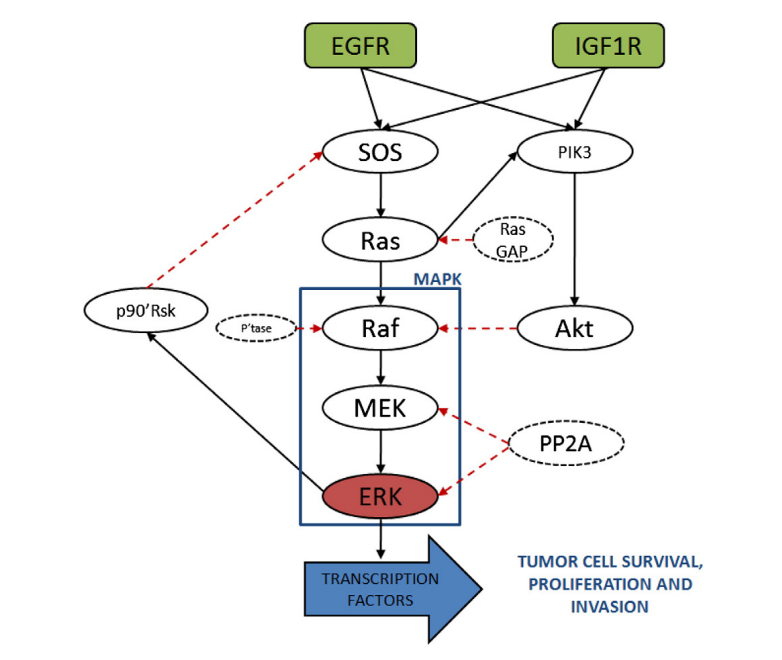

_MAPK Cascade_

MAPKs are serine/threonine kinases that mediate cellular activities including cell proliferation, differentiation, survival, death and transformation. The ERK pathway plays an important role in several steps of tumor development. Activation of both EGFR and IGF1R leads to the association of cytoplasmatic adaptor proteins, which recruit the guanine nucleotide exchange factor SOS-1 to the receptor complex. SOS-1 stimulates the exchange of GTP for GDP on the small GTPase RAS. Rafkinase activates MAPK/ERK kinase(MEK), which in turn activates ERK. ERK phosphorylates several transcription factors, including SOS, which causes SOS-Grb2 complex dissociation, and interferes with Ras activation. 

_PIK3 Pathway_

PIK3s are a family of lipid kinases that may phosphorylate the inositol ring of inositol phospholipids in the membrane (PIP2) to produce the second messenger phosphatidylinositol-3,4,5-triphosphate (PIP3), which activates downstream Akt.
Akt is a cytosolic kinase that can phosphorylate a wide variety of substrate proteins and can negatively regulate the MAPK pathway.

##Mathematical modeling and ODEs








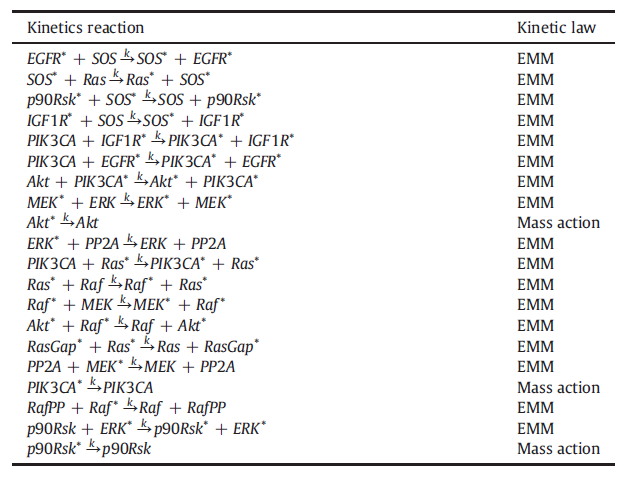

In [2]:
model = """// Created by libAntimony v2.13.2
model *MODEL1209230000()

  // Compartments and Species:
  compartment cell_nsclc;
  species EGFR_active in cell_nsclc, D_SOS in cell_nsclc, A_SOS in cell_nsclc;
  species Raf in cell_nsclc, Ras_active in cell_nsclc, Mek_active in cell_nsclc;
  species ERK in cell_nsclc, ERK_active in cell_nsclc, IGFR_active in cell_nsclc;
  species PI3KCA in cell_nsclc, PI3KCA_active in cell_nsclc, AKT_active in cell_nsclc;
  species AKT in cell_nsclc, PP2A in cell_nsclc, Ras in cell_nsclc, Raf_active in cell_nsclc;
  species Mek in cell_nsclc, RasGapActive in cell_nsclc, RafPP in cell_nsclc;
  species P90RskInactive in cell_nsclc, P90Rsk_Active in cell_nsclc;

  // Reactions:
  SOS_conformational_activation: D_SOS + EGFR_active => A_SOS + EGFR_active; SOS_conformational_activation_k_SOS_E*EGFR_active*D_SOS^SOS_conformational_activation_n_SOS/(SOS_conformational_activation_KM_SOS_E^SOS_conformational_activation_n_SOS + D_SOS^SOS_conformational_activation_n_SOS);
  kRas_Activation: A_SOS + Ras => Ras_active + A_SOS; A_SOS*kRas_Activation_k_Ras_SOS*Ras^kRas_Activation_n_Ras_SOS/(kRas_Activation_KM_Ras_SOS^kRas_Activation_n_Ras_SOS + Ras^kRas_Activation_n_Ras_SOS);
  EGFR_degradation: EGFR_active => ; gamma_EGFR*EGFR_active;
  ERK_activationBy_Mek: ERK + Mek_active => ERK_active + Mek_active; Mek_active*ERK_activationBy_Mek_k_ERK_MekActive*ERK/(ERK_activationBy_Mek_KM_ERK_MekActive + ERK);
  SOS_deactivationBy_P90: P90Rsk_Active + A_SOS => D_SOS + P90Rsk_Active; P90Rsk_Active*SOS_deactivationBy_P90_k_D_SOS_P90Rsk*A_SOS^SOS_deactivationBy_P90_n_D_SOS/(SOS_deactivationBy_P90_KM_D_SOS_P90Rsk^SOS_deactivationBy_P90_n_D_SOS + A_SOS^SOS_deactivationBy_P90_n_D_SOS);
  SOS_activationBy_IGF: IGFR_active + D_SOS => A_SOS + IGFR_active; IGFR_active*SOS_activationBy_IGF_k_A_SOS_I*D_SOS^SOS_activationBy_IGF_n_A_SOS_I/(SOS_activationBy_IGF_KM_A_SOS_I^SOS_activationBy_IGF_n_A_SOS_I + D_SOS^SOS_activationBy_IGF_n_A_SOS_I);
  PI3KCA_activationBy_IGF1R: PI3KCA + IGFR_active => PI3KCA_active + IGFR_active; IGFR_active*PI3KCA_activationBy_IGF1R_k_PI3K_IGF1R*PI3KCA^PI3KCA_activationBy_IGF1R_n_PI3K_I/(PI3KCA_activationBy_IGF1R_KM_PI3K_IGF1R^PI3KCA_activationBy_IGF1R_n_PI3K_I + PI3KCA^PI3KCA_activationBy_IGF1R_n_PI3K_I);
  PI3KCA_activationBy_EGF: PI3KCA + EGFR_active => PI3KCA_active + EGFR_active; EGFR_active*PI3KCA_activationBy_EGF_k_PI3K_EGF1R*EGFR_active*PI3KCA^PI3KCA_activationBy_EGF_n_PI3K_E/(PI3KCA_activationBy_EGF_KM_PI3K_EGF1R^PI3KCA_activationBy_EGF_n_PI3K_E + PI3KCA^PI3KCA_activationBy_EGF_n_PI3K_E);
  Akt_activationBy_PI3KCA: AKT + PI3KCA_active => AKT_active + PI3KCA_active; PI3KCA_active*Akt_activationBy_PI3KCA_k_AKT_PI3K*AKT^Akt_activationBy_PI3KCA_n_AKT_PI3K/(Akt_activationBy_PI3KCA_KM_AKT_PI3K^Akt_activationBy_PI3KCA_n_AKT_PI3K + AKT^Akt_activationBy_PI3KCA_n_AKT_PI3K);
  Akt_deactivation: AKT_active => AKT; Akt_deactivation_kd_AKT*AKT_active;
  ERK_deactivationBy_PP2A: ERK_active + PP2A => ERK + PP2A; PP2A*ERK_deactivationBy_PP2A_k_ERKactive_PP2A*ERK_active^ERK_deactivationBy_PP2A_n_ERKactive_PP2A/(ERK_deactivationBy_PP2A_KM_ERKactive_PP2A^ERK_deactivationBy_PP2A_n_ERKactive_PP2A + ERK_active^ERK_deactivationBy_PP2A_n_ERKactive_PP2A);
  PI3KCA_activationBy_kRas: PI3KCA + Ras_active => PI3KCA_active + Ras_active; Ras_active*PI3KCA_activationBy_kRas_k_PI3K_Ras*PI3KCA^PI3KCA_activationBy_kRas_n_PI3K_Ras/(PI3KCA_activationBy_kRas_KM_PI3K_Ras^PI3KCA_activationBy_kRas_n_PI3K_Ras + PI3KCA^PI3KCA_activationBy_kRas_n_PI3K_Ras);
  Raf_activationBy_kRas: Ras_active + Raf => Raf_active + Ras_active; Ras_active*Raf_activationBy_kRas_k_Raf_RasActive*Raf^Raf_activationBy_kRas_n_Raf_RasActive/(Raf_activationBy_kRas_KM_Raf_RasActive + Raf^Raf_activationBy_kRas_n_Raf_RasActive);
  Mek_activationBy_Raf: Raf_active + Mek => Mek_active + Raf_active; Raf_active*Mek_activationBy_Raf_k_Mek_PP2A*Mek^Mek_activationBy_Raf_n_Mek_PP2A/(Mek_activationBy_Raf_KM_MekPP2A^Mek_activationBy_Raf_n_Mek_PP2A + Mek^Mek_activationBy_Raf_n_Mek_PP2A);
  Raf_deactivationBy_Akt: AKT_active + Raf_active => Raf + AKT_active; AKT_active*Raf_deactivationBy_Akt_k_Raf_AKT*Raf_active^Raf_deactivationBy_Akt_n_Raf_AKT/(Raf_deactivationBy_Akt_KM_Raf_AKT^Raf_deactivationBy_Akt_n_Raf_AKT + Raf_active^Raf_deactivationBy_Akt_n_Raf_AKT);
  Ras_deactivation: RasGapActive + Ras_active => Ras + RasGapActive; RasGapActive*Ras_deactivation_k_RasActiveRasGap*Ras_active^Ras_deactivation_n_RasActiveRasGap/(Ras_deactivation_KM_RasActiveRasGap^Ras_deactivation_n_RasActiveRasGap + Ras_active^Ras_deactivation_n_RasActiveRasGap);
  Mek_deactivation: PP2A + Mek_active => Mek + PP2A; PP2A*Mek_deactivation_k_MekActivePP2A*Mek_active^Mek_deactivation_n_MekActivePP2A/(Mek_deactivation_KM_MekActivePP2A^Mek_deactivation_n_MekActivePP2A + Mek_active^Mek_deactivation_n_MekActivePP2A);
  IGFR_active_degradation: IGFR_active => ; gamma_IGFR*IGFR_active;
  PI3KCA_deactivation: PI3KCA_active => PI3KCA; kd_PI3K_a*PI3KCA_active;
  Raf_deactivation: RafPP + Raf_active => Raf + RafPP; RafPP*Raf_deactivation_k_RasActive_RafPP*Raf_active^Raf_deactivation_n_RasActive_RafPP/(Raf_deactivation_KM_RasActive_RafPP^Raf_deactivation_n_RasActive_RafPP + Raf_active^Raf_deactivation_n_RasActive_RafPP);
  P90_activationBy_ERK: P90RskInactive + ERK_active => P90Rsk_Active + ERK_active; ERK_active*k_P90Rsk_ERKActive*P90RskInactive/(KM_P90Rsk_ERKActive + P90RskInactive);
  P90_deactivation: P90Rsk_Active => P90RskInactive; P90_deactivation_kd_P90Rsk*P90Rsk_Active;

  // Species initializations:
  EGFR_active = 8000/cell_nsclc;
  A_SOS = 0;
  D_SOS = 120000/cell_nsclc;
  Raf = 120000/cell_nsclc;
  Ras_active = 0;
  Mek_active = 0;
  ERK = 600000/cell_nsclc;
  ERK_active = 0;
  IGFR_active = 800/cell_nsclc;
  PI3KCA = 120000/cell_nsclc;
  PI3KCA_active = 0;
  AKT_active = 0;
  AKT = 600000/cell_nsclc;
  PP2A = 120000/cell_nsclc;
  Ras = 120000/cell_nsclc;
  Raf_active = 0;
  Mek = 600000/cell_nsclc;
  RasGapActive = 120000/cell_nsclc;
  RafPP = 120000/cell_nsclc;
  P90RskInactive = 120000/cell_nsclc;
  P90Rsk_Active = 0;

  // Compartment initializations:
  cell_nsclc = 1;

  // Variable initializations:
  gamma_IGFR = 0.02;
  kd_PI3K_a = 0.005;
  k_P90Rsk_ERKActive = 0.0213697;
  KM_P90Rsk_ERKActive = 763523;
  gamma_EGFR = 0.02;
  SOS_conformational_activation_k_SOS_E = 694.731;
  SOS_conformational_activation_n_SOS = 1;
  SOS_conformational_activation_KM_SOS_E = 6086070;
  kRas_Activation_k_Ras_SOS = 32.344;
  kRas_Activation_n_Ras_SOS = 1;
  kRas_Activation_KM_Ras_SOS = 35954.3;
  ERK_activationBy_Mek_k_ERK_MekActive = 9.85367;
  ERK_activationBy_Mek_KM_ERK_MekActive = 1007340;
  SOS_deactivationBy_P90_k_D_SOS_P90Rsk = 161197;
  SOS_deactivationBy_P90_n_D_SOS = 1;
  SOS_deactivationBy_P90_KM_D_SOS_P90Rsk = 896896;
  SOS_activationBy_IGF_k_A_SOS_I = 500;
  SOS_activationBy_IGF_n_A_SOS_I = 1;
  SOS_activationBy_IGF_KM_A_SOS_I = 100000;
  PI3KCA_activationBy_IGF1R_k_PI3K_IGF1R = 10.6737;
  PI3KCA_activationBy_IGF1R_n_PI3K_I = 1;
  PI3KCA_activationBy_IGF1R_KM_PI3K_IGF1R = 184912;
  PI3KCA_activationBy_EGF_k_PI3K_EGF1R = 10.6737;
  PI3KCA_activationBy_EGF_n_PI3K_E = 1;
  PI3KCA_activationBy_EGF_KM_PI3K_EGF1R = 184912;
  Akt_activationBy_PI3KCA_k_AKT_PI3K = 0.0566279;
  Akt_activationBy_PI3KCA_n_AKT_PI3K = 1;
  Akt_activationBy_PI3KCA_KM_AKT_PI3K = 653951;
  Akt_deactivation_kd_AKT = 0.005;
  ERK_deactivationBy_PP2A_k_ERKactive_PP2A = 8.8912;
  ERK_deactivationBy_PP2A_n_ERKactive_PP2A = 1;
  ERK_deactivationBy_PP2A_KM_ERKactive_PP2A = 3496490;
  PI3KCA_activationBy_kRas_k_PI3K_Ras = 0.0771067;
  PI3KCA_activationBy_kRas_n_PI3K_Ras = 1;
  PI3KCA_activationBy_kRas_KM_PI3K_Ras = 272056;
  Raf_activationBy_kRas_k_Raf_RasActive = 0.884096;
  Raf_activationBy_kRas_n_Raf_RasActive = 1;
  Raf_activationBy_kRas_KM_Raf_RasActive = 62464.6;
  Mek_activationBy_Raf_k_Mek_PP2A = 185.759;
  Mek_activationBy_Raf_n_Mek_PP2A = 1;
  Mek_activationBy_Raf_KM_MekPP2A = 4768350;
  Raf_deactivationBy_Akt_k_Raf_AKT = 15.1212;
  Raf_deactivationBy_Akt_n_Raf_AKT = 1;
  Raf_deactivationBy_Akt_KM_Raf_AKT = 119355;
  Ras_deactivation_k_RasActiveRasGap = 1509.36;
  Ras_deactivation_n_RasActiveRasGap = 1;
  Ras_deactivation_KM_RasActiveRasGap = 1432410;
  Mek_deactivation_k_MekActivePP2A = 2.83243;
  Mek_deactivation_n_MekActivePP2A = 1;
  Mek_deactivation_KM_MekActivePP2A = 518753;
  Raf_deactivation_k_RasActive_RafPP = 0.126329;
  Raf_deactivation_n_RasActive_RafPP = 1;
  Raf_deactivation_KM_RasActive_RafPP = 1061.71;
  P90_deactivation_kd_P90Rsk = 0.005;

  // Other declarations:
  const cell_nsclc, gamma_IGFR, kd_PI3K_a, k_P90Rsk_ERKActive, KM_P90Rsk_ERKActive;
  const gamma_EGFR;

  // Display Names:
  SOS_conformational_activation is "SOS conformational activation";
  kRas_Activation is "kRas Activation";
  EGFR_degradation is "EGFR degradation";
  ERK_activationBy_Mek is "ERK activation by Mek";
  SOS_deactivationBy_P90 is "SOS deactivation by P90";
  SOS_activationBy_IGF is "SOS activation by IGF";
  PI3KCA_activationBy_IGF1R is "PI3KCA activation by IGF1R";
  PI3KCA_activationBy_EGF is "PI3KCA activation by EGF";
  Akt_activationBy_PI3KCA is "Akt activation by PI3KCA";
  Akt_deactivation is "Akt deactivation";
  ERK_deactivationBy_PP2A is "ERK deactivation by PP2A";
  PI3KCA_activationBy_kRas is "PI3KCA activation by kRas";
  Raf_activationBy_kRas is "Raf activation by kRas";
  Mek_activationBy_Raf is "Mek activation by Raf";
  Raf_deactivationBy_Akt is "Raf deactivation by Akt";
  Ras_deactivation is "Ras deactivation by RasGab";
  Mek_deactivation is "Mek deactivation by PP2A";
  IGFR_active_degradation is "IGFR active degradation";
  PI3KCA_deactivation is "PI3KCA deactivation";
  Raf_deactivation is "Raf deactivation by RafPP";
  P90_activationBy_ERK is "P90 activation by ERK";
  P90_deactivation is "P90 deactivation";

  // CV terms:
  cell_nsclc hypernym "http://identifiers.org/bto/BTO:0002058"
  EGFR_active hypernym "http://identifiers.org/uniprot/Q504U8"
  D_SOS hypernym "http://identifiers.org/uniprot/Q07889"
  A_SOS hypernym "http://identifiers.org/uniprot/Q07889"
  Raf hypernym "http://identifiers.org/uniprot/P04049"
  Ras_active hypernym "http://identifiers.org/uniprot/P62070"
  Mek_active hypernym "http://identifiers.org/uniprot/Q02750"
  ERK hypernym "http://identifiers.org/uniprot/P27361"
  ERK_active hypernym "http://identifiers.org/uniprot/P27361"
  IGFR_active hypernym "http://identifiers.org/uniprot/Q9H665"
  PI3KCA hypernym "http://identifiers.org/uniprot/O00443"
  PI3KCA_active hypernym "http://identifiers.org/uniprot/O00443"
  AKT_active hypernym "http://identifiers.org/uniprot/P31751"
  AKT hypernym "http://identifiers.org/uniprot/P31751"
  PP2A hypernym "http://identifiers.org/go/GO:0000159"
  Ras hypernym "http://identifiers.org/uniprot/P62070"
  Raf_active hypernym "http://identifiers.org/uniprot/P04049"
  Mek hypernym "http://identifiers.org/uniprot/Q02750"
  RasGapActive part "http://identifiers.org/uniprot/P62070"
  RafPP hypernym "http://identifiers.org/uniprot/P04049"
  P90RskInactive hypernym "http://identifiers.org/uniprot/Q9UK32"
  P90Rsk_Active hypernym "http://identifiers.org/uniprot/Q9UK32"
end

MODEL1209230000 is "Bianconi2012 - EGFR and IGF1R pathway in lung cancer"

MODEL1209230000 model_entity_is "http://identifiers.org/biomodels.db/MODEL1209230000"
MODEL1209230000 model_entity_is "http://identifiers.org/biomodels.db/BIOMD0000000427"
MODEL1209230000 description "http://identifiers.org/pubmed/21620944"
MODEL1209230000 property "http://identifiers.org/mamo/MAMO_0000046"
MODEL1209230000 taxon "http://identifiers.org/taxonomy/9606"
MODEL1209230000 parthood "http://identifiers.org/go/GO:0048009",
                         "http://identifiers.org/go/GO:0007173",
                         "http://identifiers.org/pw/PW:0000703"
MODEL1209230000 hypernym "http://identifiers.org/go/GO:0070372",
                         "http://identifiers.org/go/GO:0014066"
MODEL1209230000 version "http://identifiers.org/doid/DOID:3908"



"""

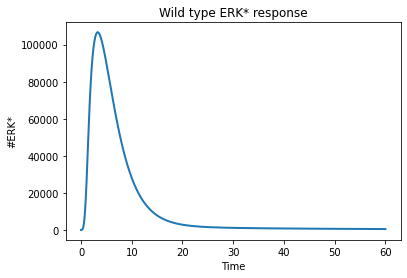

In [3]:
r = te.loada(model)
vals = r.simulate(0,60,1000, ['time','ERK_active'])
p = te.plotArray(vals, show=False)
plt.title('Wild type ERK* response')
plt.xlabel('Time')
plt.ylabel('#ERK*')
plt.show()

In [4]:
@widgets.interact(initial_egfr_val=widgets.IntSlider(min=0, max=20000, step=50, description = "Initial EGFR:",indent=True, value = 1),
                  initial_igfr_val=widgets.IntSlider(min=0, max=20000, step=50, description = "Initial IGF1R:", value = 1,indent=True))


def time_response_egfr_igfr(initial_egfr_val, initial_igfr_val):
    r = te.loada(model)
    r.reset()
    r.EGFR_active = initial_egfr_val
    r.IGFR_active = initial_igfr_val
    vals = r.simulate(0,60,1000, ['time','EGFR_active','IGFR_active'])
    p = te.plotArray(vals, show=False)
   
    plt.title('EGFR and IGF1R receptors time responses.')
    plt.xlabel('Time')
    plt.ylabel('#Active Receptors')
    plt.legend(('EGFR_active','IGFR_active'))
    plt.show()

interactive(children=(IntSlider(value=1, description='Initial EGFR:', max=20000, step=50), IntSlider(value=1, …

Analysis with the initial conditions are not equilibrium values in that they described the receptor state immediately after the action of an external stimuli, which we assume as impulsive, for the sake of modeling simplicity. below code compares ERK time response under wild type condition with receptors down expression, IGF1R over expression, EGFR over expression and IGF1R and EGFR co-expression. The simulations suggest that there is a strong signal transduction when there is a high expression of both
receptors.

In [5]:
@widgets.interact(select_model_type = widgets.ToggleButtons( placeholder='Choose Model',options=['Wild Type', 'Active Receptors down-expression', 'IGF1R over-expression','EGFR over-expression','EGFR_IGF1R Co-expression','All'],
    description='Select Model:',
    ensure_option=True,button_style='',
    disabled=False
))

def time_response_erk(select_model_type):
    
    r = te.loada(model)
    
    if select_model_type == 'Wild Type':
        r.reset()
        r.EGFR_active, r.IGFR_active = 8000, 800
        vals = r.simulate(0,60,100, ['time','ERK_active'])
        p = te.plotArray(vals, show=False)
        plt.setp(p, color='r')
        plt.title('ERK* time response: wild type')
        plt.xlabel('Time')
        plt.ylabel('#ERK*')
        plt.show()
        
    elif select_model_type == 'Active Receptors down-expression':
        r.reset()
        r.EGFR_active, r.IGFR_active = 2000, 200
        vals = r.simulate(0,60,100, ['time','ERK_active'])
        p = te.plotArray(vals, show=False)
        plt.setp(p, color='b')
        plt.title('ERK* time response: EGFR and IGF1R down expression')
        plt.xlabel('Time')
        plt.ylabel('#ERK*')
        plt.show()
        
    elif select_model_type == 'IGF1R over-expression':
        r.reset()
        r.EGFR_active, r.IGFR_active = 8000, 1600
        vals = r.simulate(0,60,100, ['time','ERK_active'])
        p = te.plotArray(vals, show=False)
        plt.setp(p, color='c')
        plt.title('ERK* time response: IGF1R over expression')
        plt.xlabel('Time')
        plt.ylabel('#ERK*')
        plt.show()
        
    elif select_model_type == 'EGFR over-expression':
        r.reset()
        r.EGFR_active, r.IGFR_active = 16000, 800
        vals = r.simulate(0,60,100, ['time','ERK_active'])
        p = te.plotArray(vals, show=False)
        plt.setp(p, color='m')
        plt.title('ERK* time response: EGFR over expression')
        plt.xlabel('Time')
        plt.ylabel('#ERK*')
        plt.show()
    
    elif select_model_type == 'EGFR_IGF1R Co-expression':
        r.reset()
        r.EGFR_active, r.IGFR_active = 800, 800
        vals = r.simulate(0,60,100, ['time','ERK_active'])
        p = te.plotArray(vals, show=False)
        plt.setp(p, color='g')
        plt.title('ERK* time response: EGFR and IGF1R co-expression')
        plt.xlabel('Time')
        plt.ylabel('#ERK*')
        plt.show()
    elif select_model_type == 'All':
        initial_values_egfr = [8000,1000,8000,1600000,80]
        initial_values_igfr = [800,200,1600,800,80]
        for egfr , igfr in zip(initial_values_egfr,initial_values_igfr):
            r.reset()
            r.EGFR_active, r.IGFR_active = egfr, igfr
            vals = r.simulate(0,60,100, ['ERK_active'])
            plt.plot(vals)
        plt.title('#ERK time responses')
        plt.xlabel('Time')
        plt.ylabel('#ERK*')
        plt.legend(('EGFR and IGF1R WT', 'Active Receptors down-expression', 'IGF1R over-expression','EGFR over-expression','EGFR_IGF1R Co-expression'),loc = 0)
        plt.show()
 

interactive(children=(ToggleButtons(description='Select Model:', options=('Wild Type', 'Active Receptors down-…

1. SOS complex was takene into account for all the adapter proteins.

2. Ras to take into account the GTPase triggering the MAPK module and PIK3 in view of its relevance as a cytoplasmatic signaling pathway activated by both receptors.

3. Akt as part of a negative regulation feedback; 

4. finally the negative feedback of ERK on SOS mediated through p90′Rsk.

In [6]:
@widgets.interact(initial_akt=widgets.IntSlider(min=0, max=600000, step=1000, description = "Initial AKT:",indent=True, value = 600000))

def time_response_akt(initial_akt):
    anlysis2 = te.loada(model)
    anlysis2.reset()
    anlysis2.AKT_active = initial_akt
    vals = anlysis2.simulate(0,5,100, ['time','AKT_active','Raf_active'])
    p = te.plotArray(vals, show=False)    
    
    plt.title('Response of AKT on Raf')
    plt.xlabel('Time')
    plt.ylabel('AKT negative feedback on Raf')
    plt.legend(('AKT_active','Raf_active')) #'IGFR_active','Ras_active','EGFR_active'
    plt.show() 


interactive(children=(IntSlider(value=600000, description='Initial AKT:', max=600000, step=1000), Output()), _…

In [7]:
caption = widgets.Label(value='**The slider value is in its initial position.**')
display(caption)
@widgets.interact(PP2A=widgets.IntSlider(min=1200, max=120000, step=1000, description = "Initial PP2A:",indent=True, value = 120000))

def time_response_pp2a(PP2A):
    analysis3 = te.loada(model)
    analysis3.reset()
    analysis3.PP2A = PP2A
    vals = analysis3.simulate(0,5,100, ['time','Mek_active','ERK_active','PP2A'])
    p = te.plotArray(vals, show=False)
   
    plt.title('Response of PP2A on MAPK pathway')
    plt.xlabel('Time')
    plt.ylabel('#Active Receptors')
    plt.legend(('Mek_active','ERK_active','PP2A')) #'IGFR_active','Ras_active','EGFR_active'
    plt.show()
    


Label(value='**The slider value is in its initial position.**')

interactive(children=(IntSlider(value=120000, description='Initial PP2A:', max=120000, min=1200, step=1000), O…

In [8]:
caption = widgets.Label(value='**The slider value will be in its initial position.**')
display(caption)

@widgets.interact(sos=widgets.IntSlider(min=0, max=120000, step=1000, description = "Initial PP2A:",indent=True, value = 120000))

def time_response_sos(sos):
    analysis5 = te.loada(model)
    analysis5.reset()
    analysis5.A_SOS = sos
    vals = analysis5.simulate(0,5,100, ['time','A_SOS','ERK_active','D_SOS'])
    p = te.plotArray(vals, show=False)
   
    plt.title('Response of SOS on MAPK pathway')
    plt.xlabel('Time')
    plt.ylabel('#Active Receptors')
    plt.legend(('A_SOS','ERK_active','D_SOS')) #'IGFR_active','Ras_active','EGFR_active'
    plt.show()
    

    


Label(value='**The slider value will be in its initial position.**')

interactive(children=(IntSlider(value=120000, description='Initial PP2A:', max=120000, step=1000), Output()), …

In [9]:
caption = widgets.Label(value='Analyze each pathway\'s response on ERK')
display(caption)
@widgets.interact(pathway=widgets.RadioButtons(options=['EGFR', 'IGF1R', 'Both'],description='Select Pathway:',disabled=False))

def response_on_erk(pathway):
    analysis4 = te.loada(model) 
    selections=['time','ERK_active','EGFR_active','IGFR_active']
    if pathway == 'EGFR':
        analysis4.reset()
        analysis4.IGFR_active = 0
        analysis4.PI3KCA = 0 
        analysis4.AKT = 0
        vals = analysis4.simulate(0,60,1000, selections=selections)
        p = te.plotArray(vals, show=False)
    
    
        plt.title('Response of EGFR on ERK.')
        plt.xlabel('Time')
        plt.ylabel('#Active Receptors')
        plt.yscale("log")
        plt.legend(('ERK_active','EGFR_active','IGFR_active')) #'IGFR_active','Ras_active','EGFR_active'
        plt.show()
    elif pathway == 'IGF1R':
        analysis4.resetToOrigin()
        analysis4.EGFR_active = 0 
        analysis4.D_SOS = 0
        analysis4.Ras = 0
        analysis4.Mek = 0
        analysis4.RafPP = 0
        vals = analysis4.simulate(0,600,1000, selections=selections)
        p = te.plotArray(vals, show=False)
   
        plt.title('Response of IGF1R on ERK.')
        plt.xlabel('Time')
        plt.ylabel('#Active Receptors')
        plt.yscale("log")
        plt.legend(('ERK_active','EGFR_active','IGFR_active')) #'IGFR_active','Ras_active','EGFR_active'
        plt.show()
    else:
        analysis4.resetToOrigin()
        vals = analysis4.simulate(0,600,1000, selections=selections)
        p = te.plotArray(vals, show=False)
   
        plt.title('Response of EGFR and IGF1R on ERK')
        plt.xlabel('Time')
        plt.ylabel('#Active Receptors')
        plt.yscale("log")
        plt.legend(('ERK_active','EGFR_active','IGFR_active')) #'IGFR_active','Ras_active','EGFR_active'
        plt.show()
        
        
    

Label(value="Analyze each pathway's response on ERK")

interactive(children=(RadioButtons(description='Select Pathway:', options=('EGFR', 'IGF1R', 'Both'), value='EG…

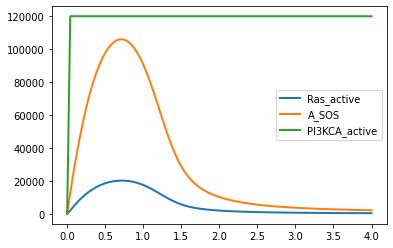

In [10]:
selections=['time','Ras_active','A_SOS','PI3KCA_active']
r = te.loada(model)
val = r.simulate(0,4,100, selections=selections)
r.plot()

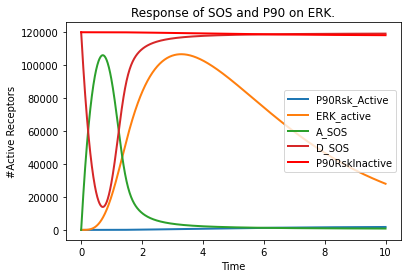

In [11]:
selections=['time','P90Rsk_Active','ERK_active','A_SOS','D_SOS','P90RskInactive']
analysis6 = te.loada(model)
val = analysis6.simulate(0,10,1000, selections=selections)
p = te.plotArray(val, show=False)
plt.setp(p, color='r')

plt.title('Response of SOS and P90 on ERK.')
plt.xlabel('Time')
plt.ylabel('#Active Receptors')
plt.legend(('P90Rsk_Active','ERK_active','A_SOS','D_SOS','P90RskInactive'), loc = 7) #'IGFR_active','Ras_active','EGFR_active'
plt.show()

## Need modification (Sensitivity Analysis)


In [12]:
selections=['time','EGFR_active','IGFR_active','ERK_active']
val = r.simulate(0,60,1000, selections=selections)

In [13]:
df = pd.DataFrame(columns=['d[ERK]/d[EGFR]', 'd[ERK]/d[IGF1R]'])
df_1 = pd.DataFrame(columns=['d[EGFR]', 'd[IGF1R]'])

In [14]:
df['d[ERK]/d[EGFR]'] = val[:,3]/val[:,1]
df['d[ERK]/d[IGF1R]'] = val[:,3]/val[:,2]
df_1['d[EGFR]'] = val[:,1]
df_1['d[IGF1R]'] = val[:,2]

In [15]:
df.corr()

,d[ERK]/d[EGFR],d[ERK]/d[IGF1R]
d[ERK]/d[EGFR],1.0,1.0
d[ERK]/d[IGF1R],1.0,1.0


In [16]:
df_1.corr()

,d[EGFR],d[IGF1R]
d[EGFR],1.0,1.0
d[IGF1R],1.0,1.0


<AxesSubplot:>

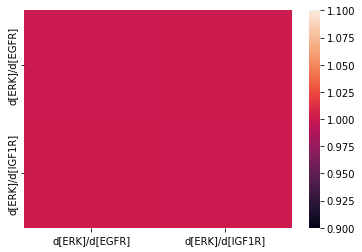

In [17]:
import seaborn as sns

sns.heatmap(df.corr())

## phase planes analysis , nullclines and Vector fields


Label(value='Interaction between the two pathway downstream EGFR and IGFR receptors')

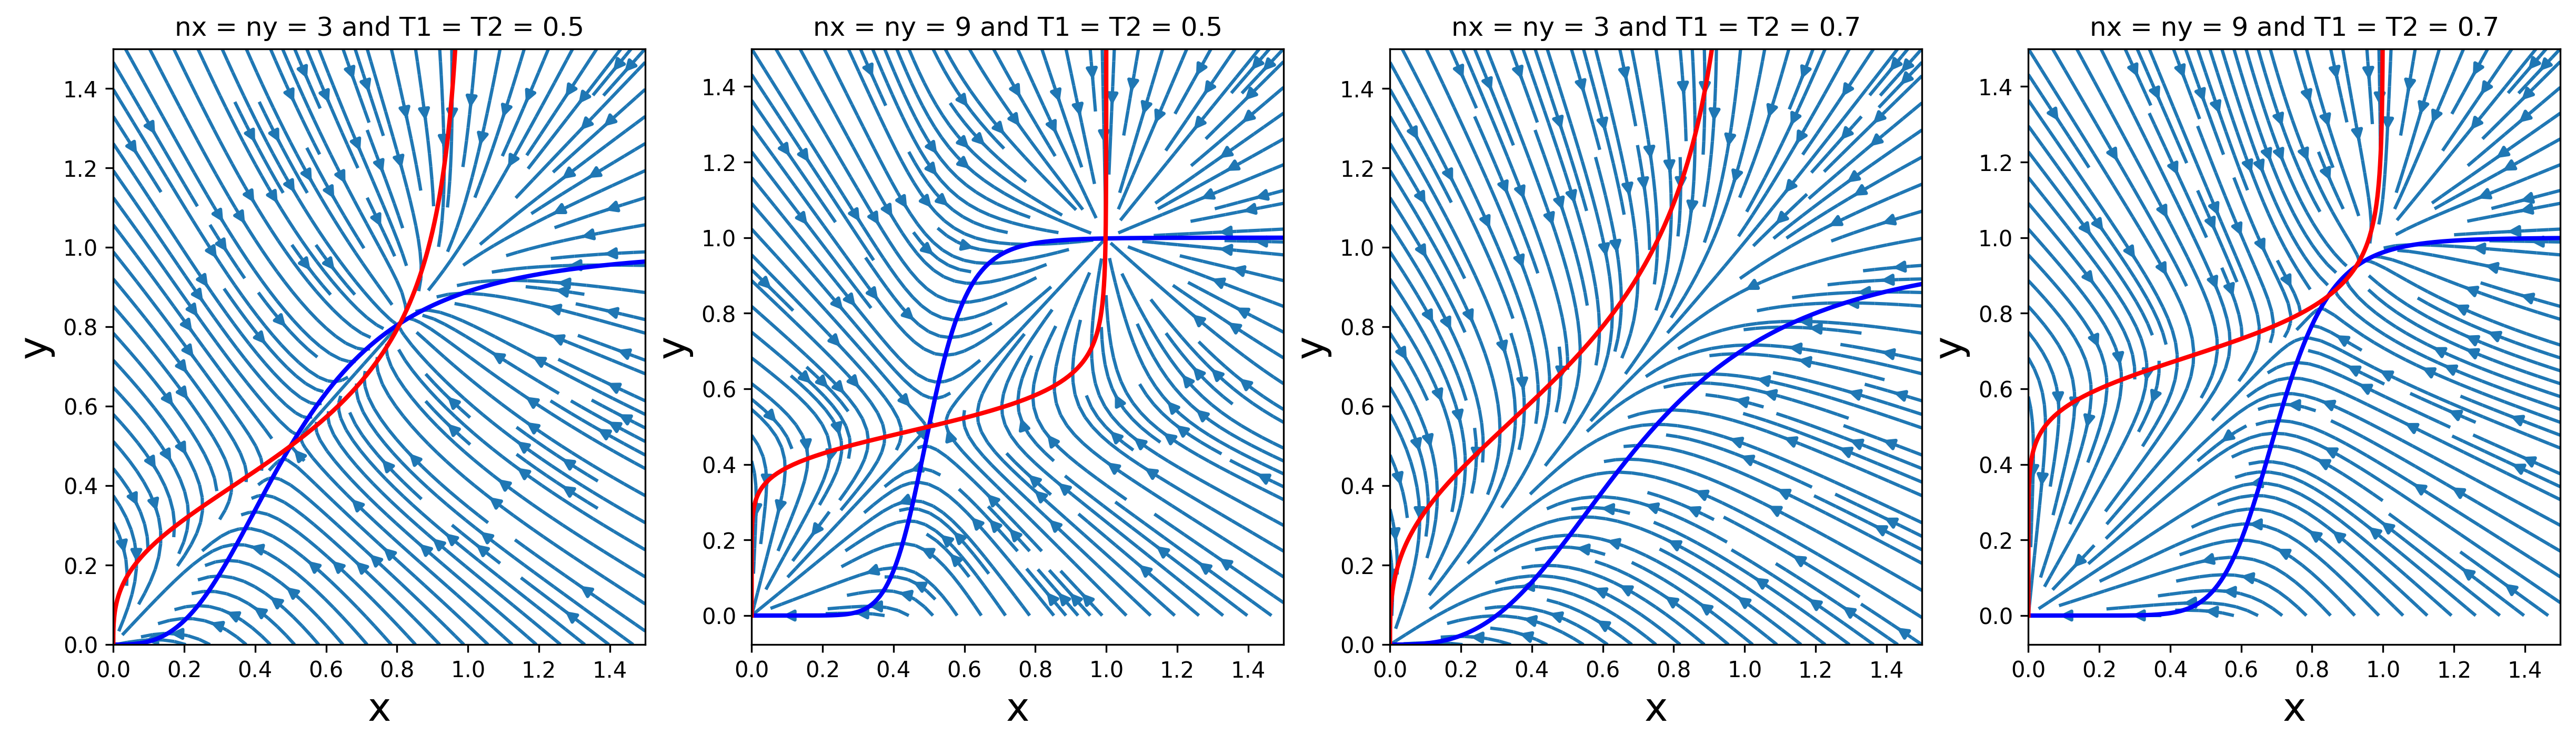

In [18]:
Y, X = np.mgrid[0:1.5:200j, 0:1.5:200j]
U, V = np.mgrid[0:1.5:200j, 0:1.5:200j]

caption = widgets.Label(value='Interaction between the two pathway downstream EGFR and IGFR receptors')
display(caption)

phasemodel = ('''
    x' = (y^ny/(T1^ny + y^ny))*Ux - x;
    y' =  (1/e)*(x^nx / (T2^nx + x^nx))*Uy - (1/e)*y;
    
    nx = 0;    
    ny = 0;
    T1 = 0;
    T2 = 0;
    Ux = 1.0;
    Uy = 1.0;
    x = 0.0;
    y = 0.0;
    e = 1.0;
    
    ''')

rp = te.loada(phasemodel)

_, ax = plt.subplots(1, 4, sharey=False, figsize=(20, 5), dpi=300)

models = {'0': [3,0.5],
         '1': [9,0.5],
         '2': [3,0.7],
         '3': [9,0.7]}

for key in models:
    rp.reset()
    rp.nx = models[key][0]
    rp.ny = models[key][0]
    rp.T1 = models[key][1]
    rp.T2 = models[key][1]
    for idx in range (200):
        for idy in range (200):
            rp.x = X[idx,idy];  rp.y = Y[idx,idy]
            U[idx,idy] = rp["x'"]
            V[idx,idy] = rp["y'"]

    ax[int(key)].set_xlabel('x', fontsize='18')
    ax[int(key)].set_ylabel('y', fontsize='18')
    ax[int(key)].streamplot(X, Y, U, V, density=[1.5, 1.5])
    ax[int(key)].set_title('nx = ny = {0} and T1 = T2 = {1}'.format(models[key][0],models[key][1]))
    
    
    #Plot nullcline_y
    nullcline_x = np.linspace(0,1.5,200)
    nullcline_y = (nullcline_x**rp.nx / (rp.T2**rp.nx + nullcline_x**rp.nx))
    ax[int(key)].plot(nullcline_x, nullcline_y, lw = 2 , color = 'b')
    
    #Plot nullcline_y
    nullcline_y = np.linspace(0,1.5,200)
    nullcline_x = (nullcline_y**rp.ny / (rp.T1**rp.ny + nullcline_y**rp.ny))*rp.Ux
    ax[int(key)].plot(nullcline_x, nullcline_y, lw = 2 , color = 'r')
    
    
    

plt.show() 

The nullclines in left most (red and blue lines) show that the system is bistable; i.e., it has two asymptotically stable equilibrium points, at which both the signal transduction level X (referred to EGFR) and Y (related to IGF1R) have a high or low value, respectively.
The third equilibrium point, characterized by intermediate values for aggregate signals X and Y, is unstable and cannot be experimentally observed.
If one disturbs the system from the stable equilibria characterized by a high expression of both aggregate signals (for example, a degradation due to some external factor to the model itself) the other equilibrium can be reached. This behavior is more evident for high cross-talk. The analysis suggests that a simple molecular mechanism may allow the system to switch from one functional state to another.

In [19]:
caption = widgets.Label(value='Analyze sensitivity on ERK*')
display(caption)
@widgets.interact(pathway=widgets.RadioButtons(options=['EGFR', 'IGF1R', 'Both'],description='Select Pathway:',disabled=False))

def sensitivity_analysis(pathway):

    if pathway == 'EGFR':
        r1 = te.loada(model)
        egfrmodel = r1.simulate(0,60,1000,['ERK_active', 'EGFR_active'])
        plot_plot(egfrmodel)
       
    elif pathway == 'IGF1R':
        r = te.loada(model)
        igfrmodel = r.simulate(0,60,1000,['ERK_active', 'IGFR_active'])
        plot_plot(igfrmodel)
       
    else:
        r = te.loada(model)
        igfrmodel = r.simulate(0,60,1000,['ERK_active', 'IGFR_active'])
        egfrmodel = r1.simulate(0,60,1000,['ERK_active', 'EGFR_active'])
        
        plot_plot(igfrmodel)
        
def plot_plot(val):
    
    for 
    
    
    
    
    






SyntaxError: invalid syntax (763276370.py, line 26)

## Statistical analysis for patient population (TODO)

In [ ]:
play = widgets.Play(
    value=50,
    min=0,
    max=100,
    step=1,
    interval=500,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

In [ ]:
r=te.loada(model)
m = r.simulate(0,10,100, ['ERK_active', 'EGFR_active'])

In [ ]:
print(list(m['ERK_active']))